# Linear Regression Assignment - Mandar Dhumal
### Bike Sharing
#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**BoomBikes wants to understand the factors on which the demand for these shared bikes depends.**

**Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.**

**The company wants to know:**
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goals
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

In [6]:
# Importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Reading the dataset
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [10]:
# Shape of the dataset
bike.shape

(730, 16)

In [12]:
# Checking the info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The dataset has no null values and has 730 rows and 16 columns
#### Dtype of all the columns are either int64 or float64 except dteday which is object

In [15]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Cleaning the data

In [18]:
# Checking null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Converting few columns to categorical columns for better readability of the dataset


In [21]:
# Season column conversion to categorical.
bike.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [23]:
# weathersit column conversion to categorical.
bike.weathersit.replace({1:'Pleasant',2:'Moderate',3:'Bad',4:'Severe'},inplace=True)

In [25]:
# Checking whether the changes has taken place
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Pleasant,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Pleasant,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Pleasant,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
# mnth column conversion to categorical
bike.mnth.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'},inplace=True)

In [29]:
# weekday column conversion to categorical
bike.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [31]:
# Checking whether the changes has taken place
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
# Dropping column instant as it has no effect on target column, and dteday as we have already mnth and weekday columns
# As model targets on cnt column and cnt is sum of casual and registered, we can drop casual and registered columns

bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)


In [35]:
# Checking whether the changes has taken place
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


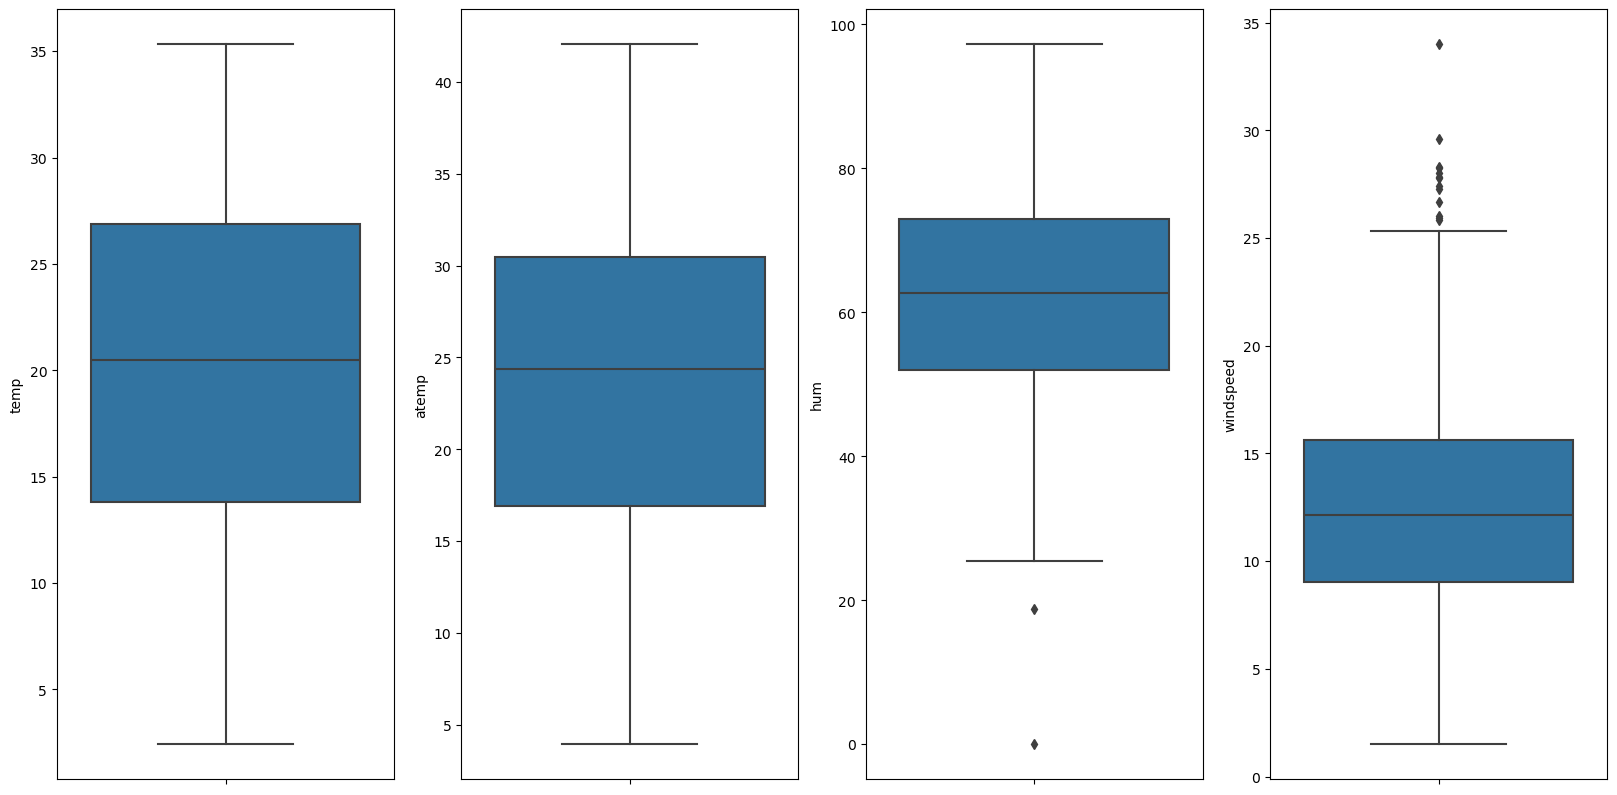

In [37]:
# Checking for the outliers
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.boxplot(y='temp', data=bike)
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=bike)
plt.subplot(1,4,3)
sns.boxplot(y='hum', data=bike)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=bike)
plt.show()

**We do not need to work on the outliers in the dataset**

### Step 3: EDA

In [41]:
#Checking the seasonal impact on the total count of rental bikes
round(bike.groupby('season')['cnt'].sum()/bike.cnt.sum()*100,2)

season
Fall      32.24
Spring    14.27
Summer    27.91
Winter    25.57
Name: cnt, dtype: float64

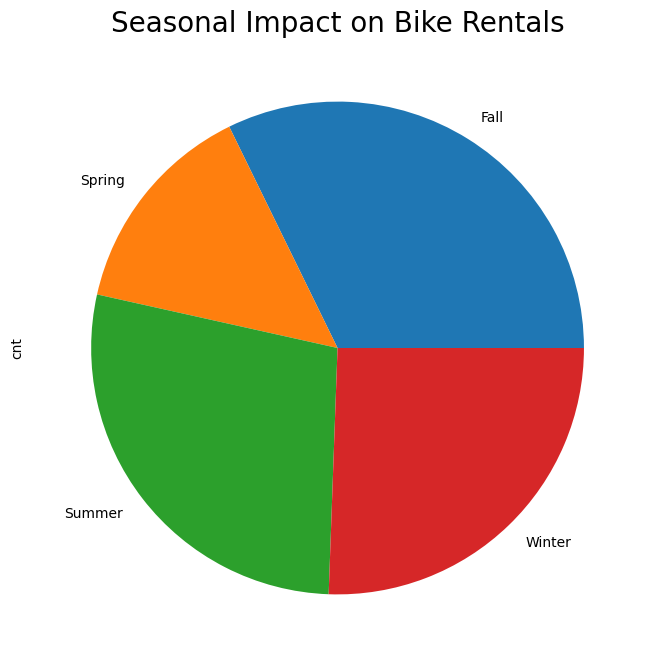

In [43]:
# Ploting a pie chart for better visualisation
plt.figure(figsize=(8,8))
bike.groupby(["season"])["cnt"].sum().plot.pie()
plt.title("Seasonal Impact on Bike Rentals",fontsize=20)
plt.show()

**It can be observed that Spring has least bike rentals while Fall has the highest bike rentals**

In [46]:
#Checking the yearwise count of rental bikes
round(bike.groupby('yr')['cnt'].sum()/bike.cnt.sum()*100,2)

yr
0    37.77
1    62.23
Name: cnt, dtype: float64

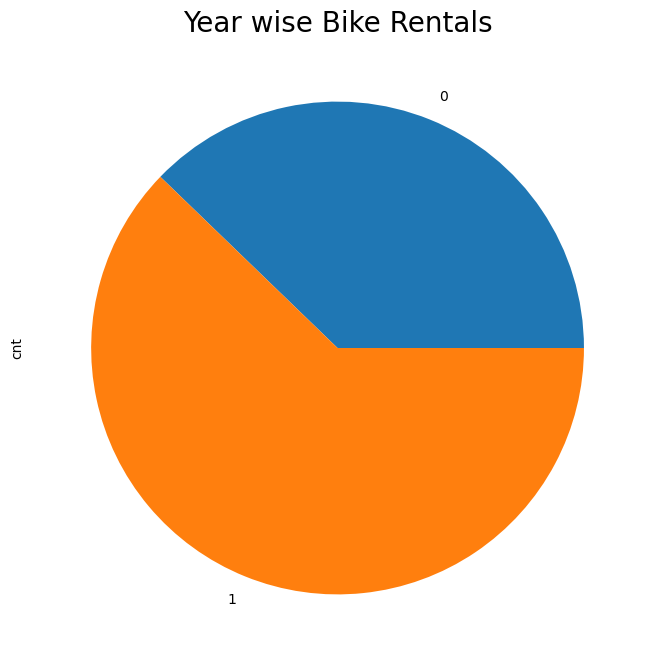

In [48]:
# Ploting a pie chart for better visualisation
plt.figure(figsize=(8,8))
bike.groupby(["yr"])["cnt"].sum().plot.pie()
plt.title("Year wise Bike Rentals",fontsize=20)
plt.show()

**The above pie shows that there is a considerable increase in year on year bike rentals from 2018 to 2019**

In [51]:
#Checking the monthly count of rental bikes
round(bike.groupby('mnth')['cnt'].sum()/bike.cnt.sum()*100,2)

mnth
April         8.18
August       10.67
December      6.41
February      4.54
January       4.10
July         10.48
June         10.52
March         6.96
May          10.08
November      7.74
October       9.80
September    10.51
Name: cnt, dtype: float64

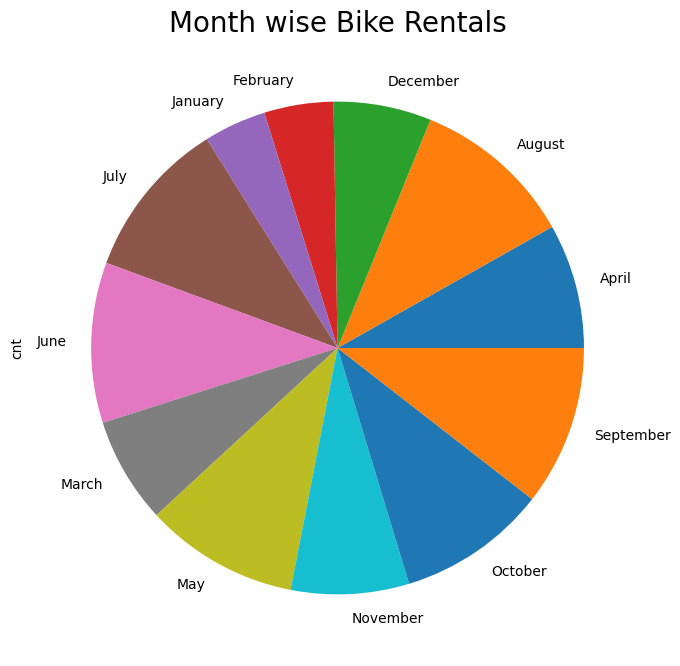

In [53]:
# Ploting a pie chart for better visualisation
plt.figure(figsize=(8,8))
bike.groupby(["mnth"])["cnt"].sum().plot.pie()
plt.title("Month wise Bike Rentals",fontsize=20)
plt.show()

**It can be observed that months from April to October has good demand for Bike Rentals**

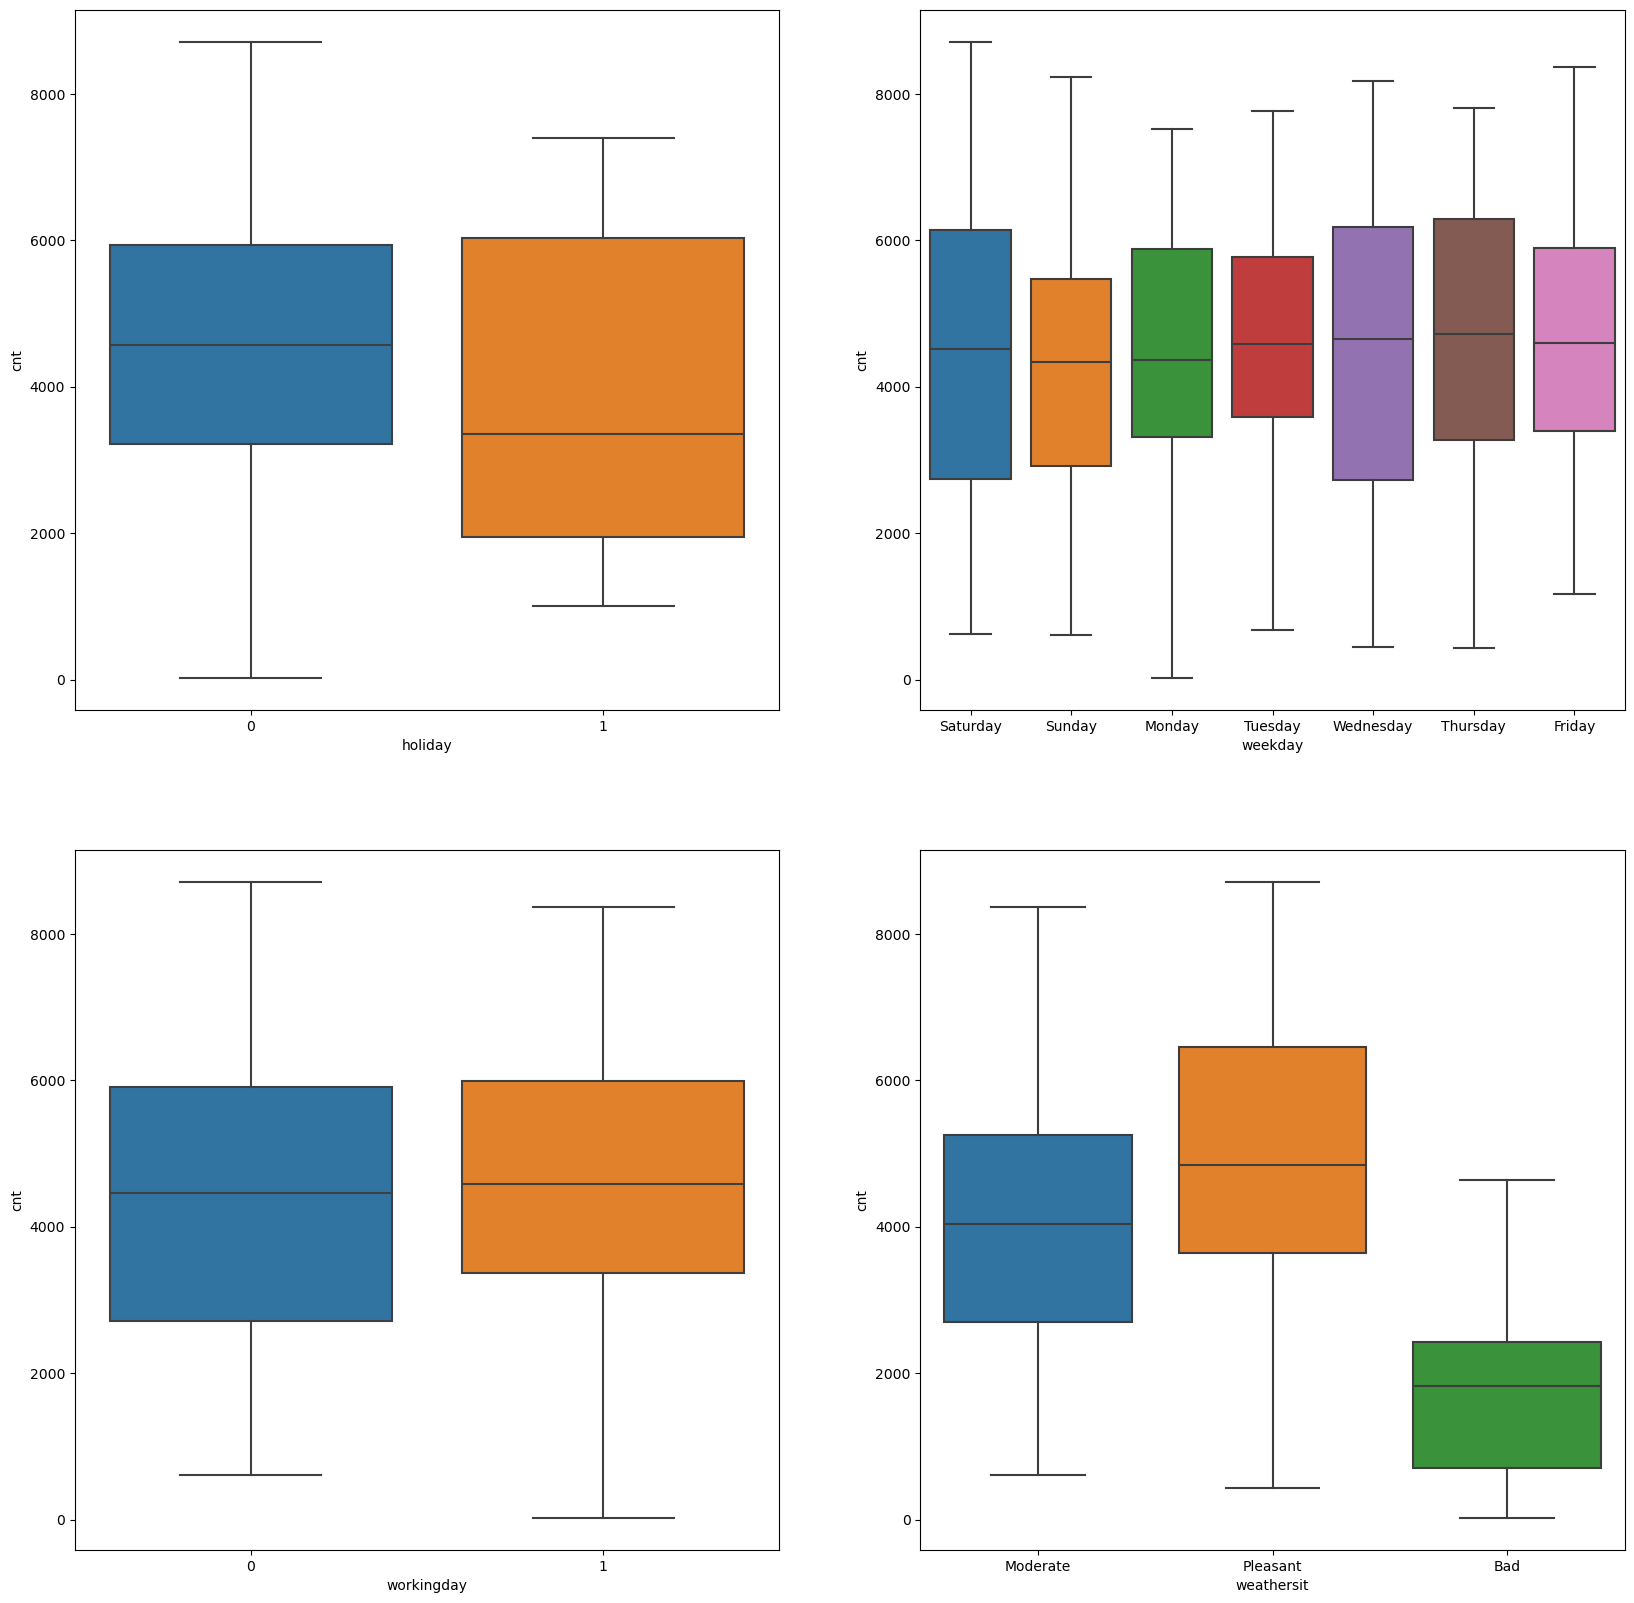

In [56]:
# Boxplot for categorical variables to see bike rentals
Categories = ['holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))
for i in enumerate(Categories):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

**It can be seen that the demand for bike rentals is good when there is Pleasant and Moderate Weather**

**No clarity about the demand can be seen when it comes to the weekdays and workingday as the demand seems almost same for all days of the week**

**It can be observed that the demand for bike rentals decreases on holidays**

<Figure size 2000x1500 with 0 Axes>

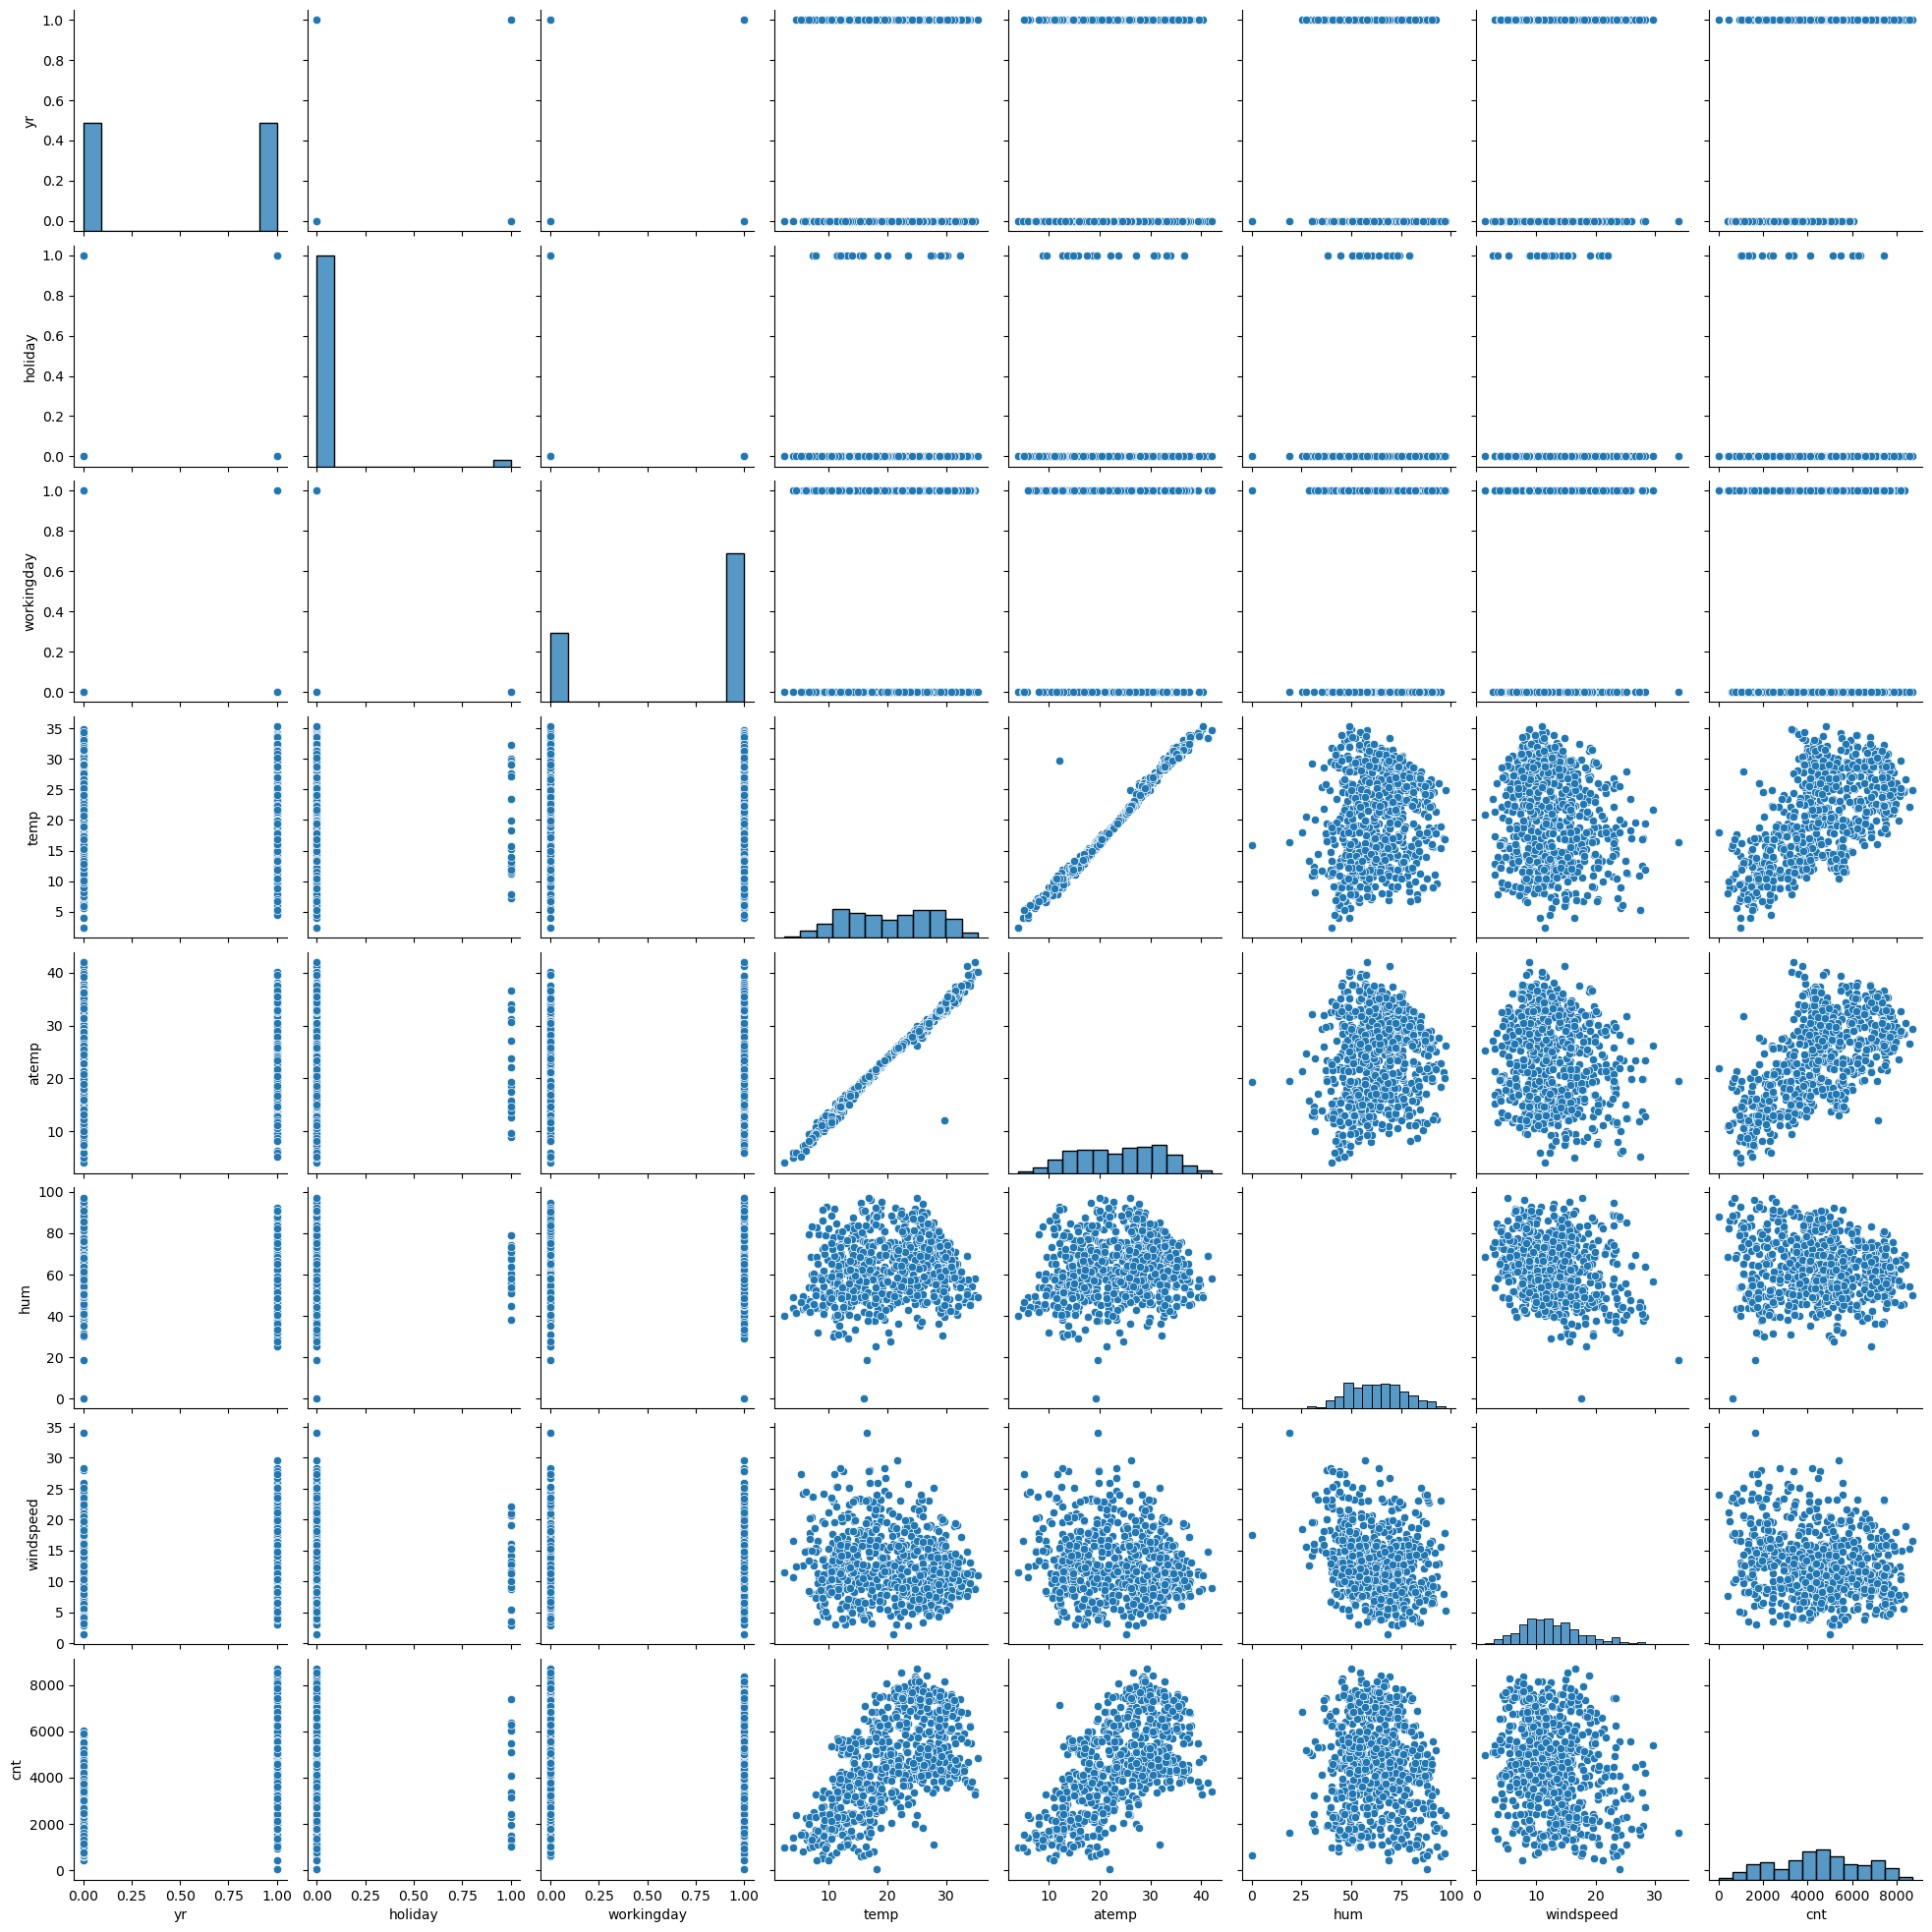

In [59]:
#Pairplots to understand the correlations of the variables
plt.figure(figsize=(20,15))
sns.pairplot(bike)
plt.show()

In [61]:
# Checking correlation
bike.corr()

ValueError: could not convert string to float: 'Spring'

**From above table and pairplot it can be observed that temp and atemp is highly correlated, we can drop one of the column.**

In [63]:
# Dropping the atemp column as it is highly correlated to temp
bike.drop('atemp',axis=1,inplace=True)

In [65]:
bike.corr()

ValueError: could not convert string to float: 'Spring'

In [67]:
#Calculating Correlation
bike_corr = bike.corr()
plt.figure(figsize=(15,10))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr,annot=True, )
plt.show()

ValueError: could not convert string to float: 'Spring'

**Few variables are showing linear relations, so this is a good dataset to form linear regression model.**

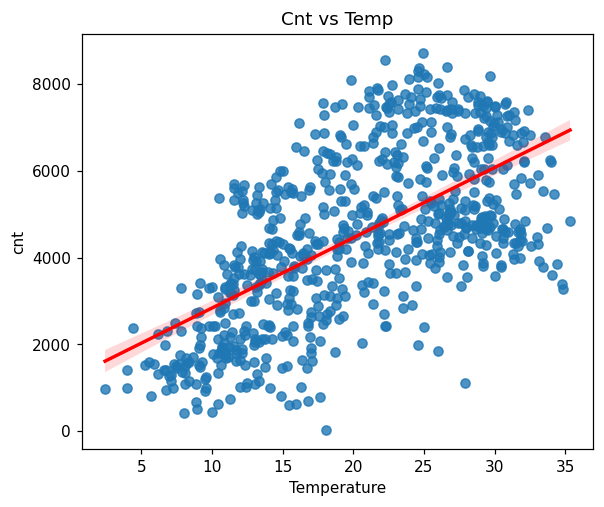

In [28]:
# Checking with regplot the correlation of cnt vs temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=12)
sns.regplot(data=bike,y="cnt",x="temp",line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

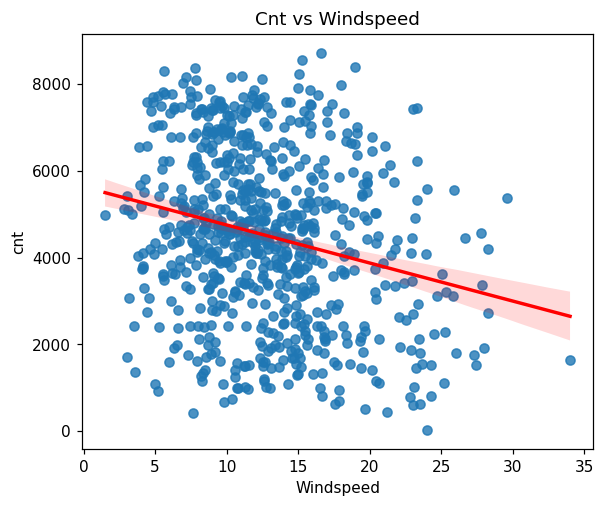

In [29]:
# Checking with regplot the correlation of cnt vs windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=12)
sns.regplot(data=bike,y="cnt",x="windspeed",line_kws={"color": "red"})
plt.xlabel("Windspeed")
plt.show()

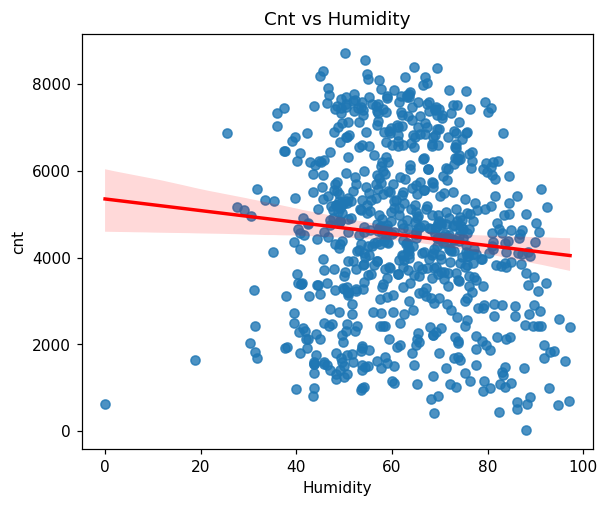

In [30]:
# Checking with regplot the correlation of cnt vs humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=12)
sns.regplot(data=bike,y="cnt",x="hum",line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.show()

**We can see that there is a positive linear relation of bike rental demand(cnt) and temp but it has negative relation with humidity and windspeed**

### Step 4: Data Preparation

In [31]:
# Get the dummy variables for the feature season, month, weathersit and weekday

bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"]) #first column is not dropped so that the info about severe weather situation.

In [32]:
# Checking how the dataset looks with dummies
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Moderate,weathersit_Pleasant
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting the data into test and train datasets


In [33]:
#Train Test split with 80:20 ratio
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)

In [34]:
df_train.shape

(584, 30)

In [35]:
df_test.shape

(146, 30)

In [36]:
### Scaling the model
scaled_var = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[scaled_var] = scaler.fit_transform(df_train[scaled_var])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Moderate,weathersit_Pleasant
367,1,0,1,0.113228,0.454701,0.695175,2236,1,0,0,...,0,0,0,0,1,0,0,0,0,1
648,1,0,1,0.468352,0.477458,0.299450,7570,0,0,1,...,0,0,0,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.387290,0.807474,1913,1,0,0,...,0,0,0,0,0,0,1,0,0,1
705,1,0,0,0.326094,0.787463,0.189819,5008,0,0,1,...,0,0,1,0,0,0,0,0,1,0
379,1,0,1,0.133996,0.431945,0.449210,2311,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Moderate,weathersit_Pleasant
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.649499,0.319463,4505.267123,0.251712,0.246575,0.250000,...,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.027397,0.342466,0.630137
std,0.500241,0.163378,0.446377,0.225336,0.144219,0.168114,1958.617712,0.434369,0.431387,0.433384,...,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.163378,0.474941,0.483181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,6035.750000,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

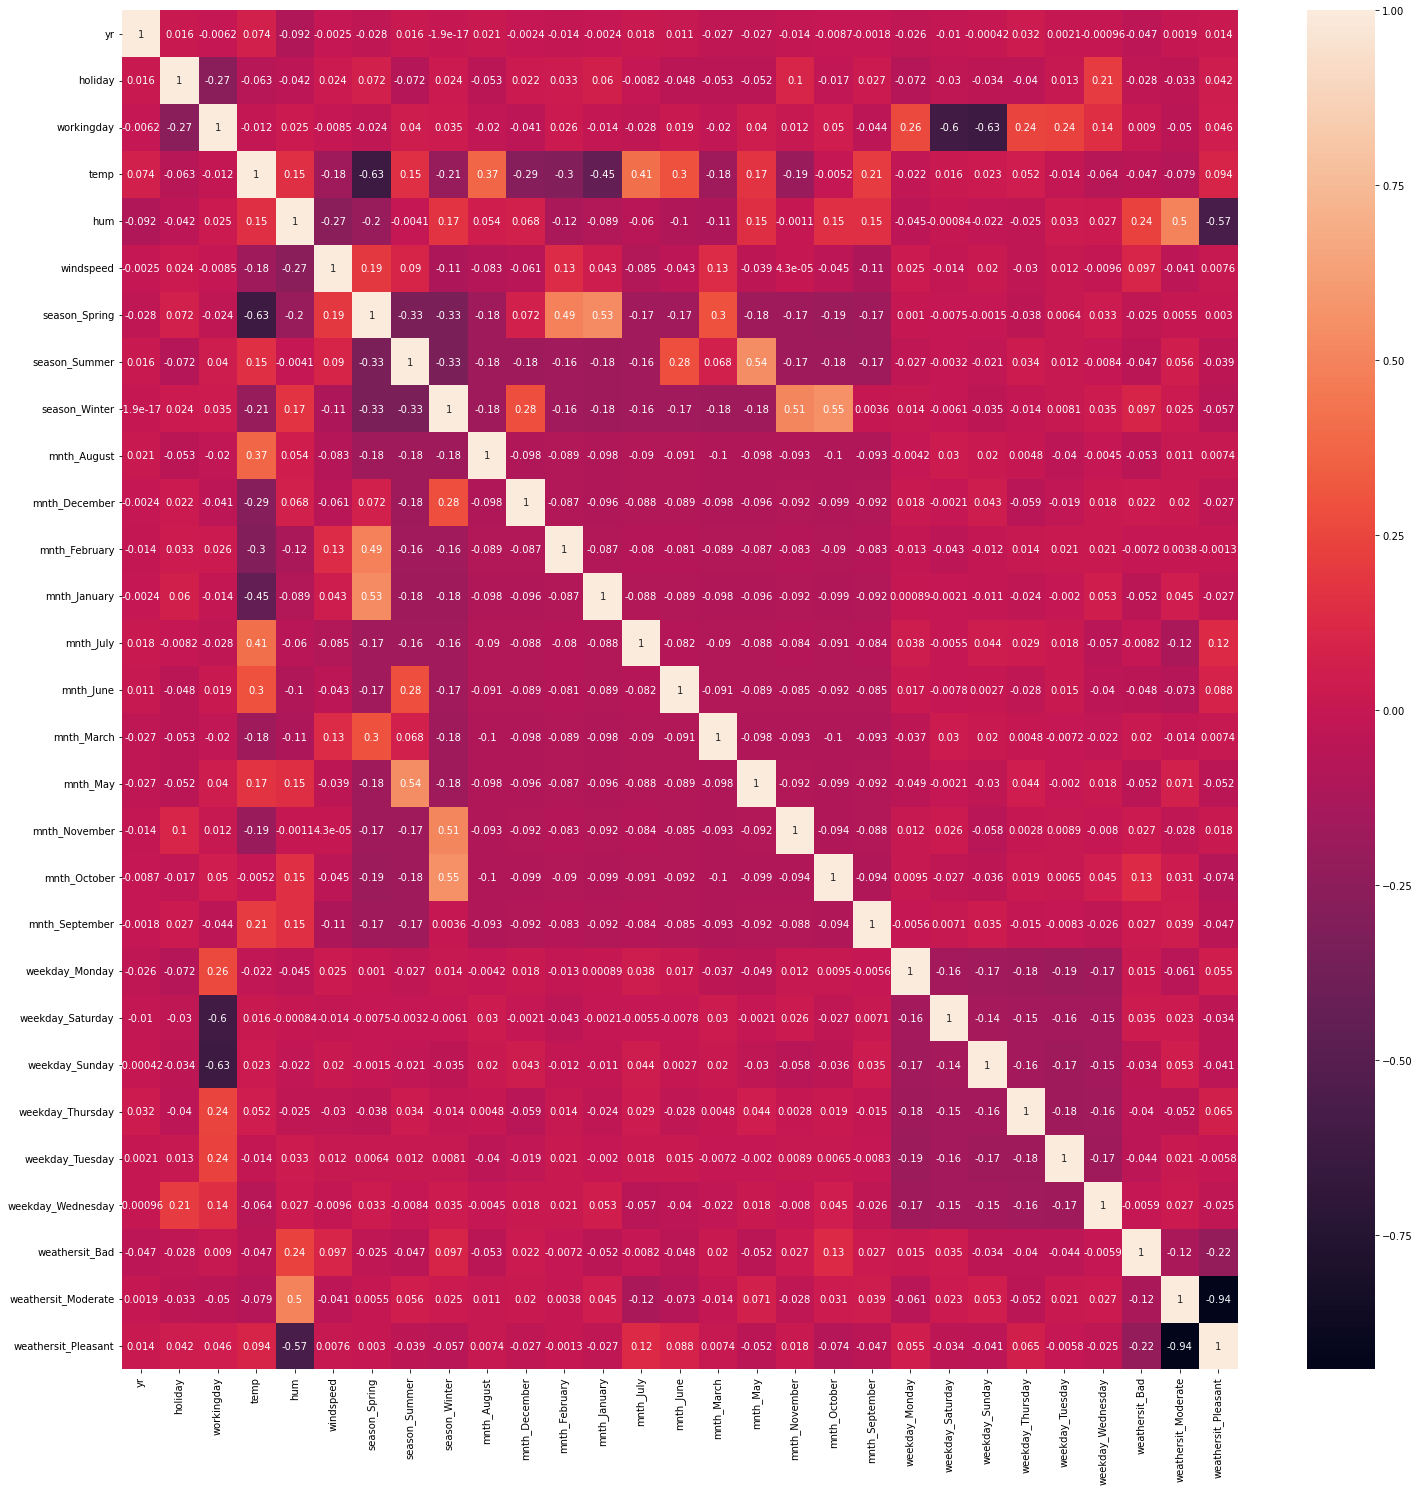

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

**We can see that few variables are positively correlated and this can be good for us to build a regression model**

### Step 5: Building a linear model using RFE 

In [41]:
# We have already imported the required libraries
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 9),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 8),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 3),
 ('weekday_Wednesday', False, 5),
 ('weathersit_Bad', True, 1),
 ('weathersit_Moderate', True, 1),
 ('weathersit_Pleasant', True, 1)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Bad', 'weathersit_Moderate', 'weathersit_Pleasant'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['mnth_August', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          3.26e-219
Time:                        13:52:21   Log-Likelihood:                -4697.7
No. Observations:                 584   AIC:                             9435.
Df Residuals:                     564   BIC:                             9523.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1732.7158    

In [49]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weathersit_Pleasant,inf
19,weathersit_Moderate,inf
18,weathersit_Bad,inf
3,workingday,70.46
17,weekday_Sunday,39.77
16,weekday_Saturday,37.21
2,holiday,8.30
7,season_Spring,5.90
4,temp,4.72
9,season_Winter,3.64


**We can drop weathersit_Pleasant as it shows infinte VIF which show multicolinearity**

In [50]:
# Dropping the weathersit_Pleasant column
X_train_new = X_train_rfe.drop(["weathersit_Pleasant"], axis = 1)


In [51]:
# Creating X_test dataframe after dropping the weathersit_Pleasant
X_train_lm = sm.add_constant(X_train_new)

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          3.26e-219
Time:                        13:52:21   Log-Likelihood:                -4697.7
No. Observations:                 584   AIC:                             9435.
Df Residuals:                     564   BIC:                             9523.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3214.6020    

In [52]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,453.06
3,workingday,70.46
17,weekday_Sunday,39.77
16,weekday_Saturday,37.21
2,holiday,8.30
7,season_Spring,5.90
4,temp,4.72
9,season_Winter,3.64
8,season_Summer,2.79
12,mnth_January,2.35


**We can drop weekday_Sunday as it is negative coefficient and high p-value**

In [53]:
# Dropping the weekday_Sunday column
X_train_new = X_train_new.drop(["weekday_Sunday"], axis = 1)

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.51e-220
Time:                        13:52:22   Log-Likelihood:                -4697.7
No. Observations:                 584   AIC:                             9433.
Df Residuals:                     565   BIC:                             9516.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3023.2373    

In [54]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.52
7,season_Spring,5.89
4,temp,4.72
9,season_Winter,3.64
8,season_Summer,2.79
12,mnth_January,2.35
5,hum,1.97
11,mnth_February,1.94
3,workingday,1.84
14,mnth_November,1.73


**We can drop weekday_Saturday as it shows negative coefficient and high p-value**

In [55]:
# Dropping the weekday_Saturday column
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Creating X_test dataframe after dropping the weekday_Saturday
X_train_lm = sm.add_constant(X_train_new)

In [56]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     191.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.05e-221
Time:                        13:52:22   Log-Likelihood:                -4697.9
No. Observations:                 584   AIC:                             9432.
Df Residuals:                     566   BIC:                             9510.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2992.4296    

In [58]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,91.00
7,season_Spring,5.89
4,temp,4.72
9,season_Winter,3.64
8,season_Summer,2.79
12,mnth_January,2.35
5,hum,1.97
11,mnth_February,1.94
14,mnth_November,1.73
10,mnth_December,1.66


**We can drop mnth_February as it shows negative coefficient and high p-value**

In [59]:
# Dropping the mnth_February column
X_train_new = X_train_new.drop(["mnth_February"], axis = 1)

# Creating X_test dataframe after dropping the mnth_February
X_train_lm = sm.add_constant(X_train_new)

In [60]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          5.42e-222
Time:                        13:52:22   Log-Likelihood:                -4699.2
No. Observations:                 584   AIC:                             9432.
Df Residuals:                     567   BIC:                             9507.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2911.5514    

In [62]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.59
7,season_Spring,5.39
4,temp,4.44
9,season_Winter,3.63
8,season_Summer,2.74
5,hum,1.97
13,mnth_November,1.68
11,mnth_January,1.64
16,weathersit_Moderate,1.61
12,mnth_July,1.51


**We can drop mnth_January as it shows negative coefficient and high p-value**

In [63]:
# Dropping the mnth_January column
X_train_new = X_train_new.drop(["mnth_January"], axis = 1)

# Creating X_test dataframe after dropping the mnth_January
X_train_lm = sm.add_constant(X_train_new)

In [64]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [65]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          8.67e-222
Time:                        13:52:22   Log-Likelihood:                -4702.5
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2747.7969    

In [66]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.43
7,season_Spring,5.38
4,temp,3.96
9,season_Winter,3.58
8,season_Summer,2.69
5,hum,1.96
12,mnth_November,1.65
15,weathersit_Moderate,1.61
11,mnth_July,1.51
10,mnth_December,1.36


**We can drop mnth_December as it shows negative coefficient and high p-value**

In [67]:
# Dropping the mnth_December column
X_train_new = X_train_new.drop(["mnth_December"], axis = 1)

# Creating X_test dataframe after dropping the mnth_December
X_train_lm = sm.add_constant(X_train_new)

In [68]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     226.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.06e-221
Time:                        13:52:23   Log-Likelihood:                -4705.5
No. Observations:                 584   AIC:                             9441.
Df Residuals:                     569   BIC:                             9507.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2622.6302    

In [70]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.83
7,season_Spring,5.27
4,temp,3.66
9,season_Winter,3.52
8,season_Summer,2.63
5,hum,1.94
14,weathersit_Moderate,1.60
10,mnth_July,1.51
11,mnth_November,1.45
12,mnth_September,1.30


**We can drop mnth_November as it shows negative coefficient and high p-value**

In [71]:
# Dropping the mnth_November column
X_train_new = X_train_new.drop(["mnth_November"], axis = 1)

# Creating X_test dataframe after dropping the mnth_November
X_train_lm = sm.add_constant(X_train_new)

In [72]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [73]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     241.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          5.67e-222
Time:                        13:52:23   Log-Likelihood:                -4707.7
No. Observations:                 584   AIC:                             9443.
Df Residuals:                     570   BIC:                             9505.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2532.8541    

In [74]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,80.00
7,season_Spring,5.11
4,temp,3.55
9,season_Winter,3.39
8,season_Summer,2.59
5,hum,1.94
13,weathersit_Moderate,1.60
10,mnth_July,1.51
11,mnth_September,1.29
12,weathersit_Bad,1.24


**We can drop workingday as it shows negative coefficient and high p-value**

In [75]:
# Dropping the workingday column
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Creating X_test dataframe after dropping the workingday
X_train_lm = sm.add_constant(X_train_new)

In [76]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [77]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          6.27e-222
Time:                        13:52:23   Log-Likelihood:                -4710.7
No. Observations:                 584   AIC:                             9447.
Df Residuals:                     571   BIC:                             9504.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2421.3237    

In [78]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.94
6,season_Spring,5.11
3,temp,3.55
8,season_Winter,3.39
7,season_Summer,2.59
4,hum,1.93
12,weathersit_Moderate,1.59
9,mnth_July,1.51
10,mnth_September,1.28
11,weathersit_Bad,1.24


In [79]:
#Dropping the const since VIF is high (VIF < 3 is ideal but less than 10 is acceptable)
X_train_new = X_train_new.drop(['const'], axis=1)

# Creating X_test dataframe after dropping the const
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          6.27e-222
Time:                        13:52:23   Log-Likelihood:                -4710.7
No. Observations:                 584   AIC:                             9447.
Df Residuals:                     571   BIC:                             9504.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2421.3237    

In [80]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.87
2,temp,16.00
4,windspeed,4.63
5,season_Spring,4.12
7,season_Winter,3.26
6,season_Summer,2.77
11,weathersit_Moderate,2.28
0,yr,2.09
8,mnth_July,1.60
9,mnth_September,1.38


In [81]:
#Dropping the const since VIF is high (VIF < 3 is ideal but less than 10 is acceptable)
X_train_new = X_train_new.drop(['hum'], axis=1)

# Creating X_test dataframe after dropping the const
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     270.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.48e-218
Time:                        13:52:24   Log-Likelihood:                -4722.1
No. Observations:                 584   AIC:                             9468.
Df Residuals:                     572   BIC:                             9521.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1651.0461    

In [82]:
# Calculate the VIFs for the model after dropping the const
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.23
3,windspeed,4.59
5,season_Summer,2.27
4,season_Spring,2.14
0,yr,2.07
6,season_Winter,1.79
7,mnth_July,1.60
10,weathersit_Moderate,1.55
8,mnth_September,1.34
9,weathersit_Bad,1.07


**Now that we VIF which is acceptable andp-value for all the features is almost 0.0 and R2 is 0.839 we will go with this model as our final model as it has all important statistics like high (R-square, Adjusted R-squared and F-statistic), Also it shows no insignificant variables and no multicollinearty (high VIF) variables. The difference between R-square and Adjusted R-square is 0.003 which shows that no further variables are required to be removed from this model.**

### Step 7. Model Evaluation 
### Residual Analysis

In [83]:
y_train_cnt = lm.predict(X_train_lm)

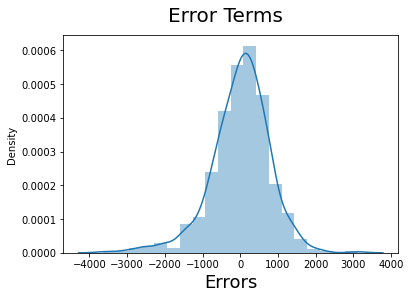

In [84]:
# Plot the histogram of the error terms to check the normality of the errors
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Residuals distribution should follow normal distribution and centred around 0.(mean = 0).
We validate this assumption about residuals by plotting a distplot of residuals and see if
residuals are following normal distribution or not.The above diagram shows that the residuals are
distributed about mean = 0.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

#### Applying the scaling on the test sets

In [85]:
num_vars = ['temp', 'windspeed', 'hum']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [86]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Moderate,weathersit_Pleasant
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,1.889185,0.130413,4518.965753,0.226027,0.273973,0.219178,...,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.034247,0.315068,0.650685
std,0.498699,0.182488,0.499409,0.238088,0.486854,0.051874,1849.283281,0.419697,0.447530,0.415114,...,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.182488,0.466142,0.478395
min,0.000000,0.000000,0.000000,0.046591,0.724590,0.015460,506.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,1.573214,0.092206,3422.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,1.823557,0.127605,4445.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.801929,2.183861,0.161517,5671.750000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,3.029478,0.286388,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('cnt')
X_test = df_test

In [88]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
# Making predictions
y_pred = lm.predict(X_test_new)

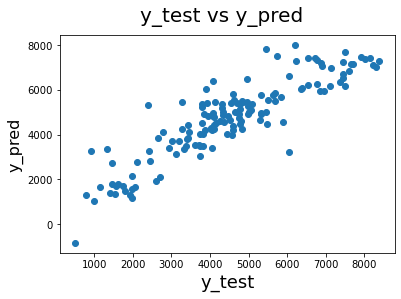

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Checking weather the error terms are independent of each other.

In [91]:
r2_score(y_test, y_pred)

0.7691642295371479

**R2 score has negligible difference, so we can infer this is the good to go model**

### Key points from the  the above model, BoomBikes should focus while going ahead with expansion plans:
- Company should focus on expanding business during Fall, Summer and Winter
- September month has shown great demand.
- It has been observed that the demand for bike rentals had gone up from 2018 to 2019. So we can say that it will go up once the situation gets normal post Covid
- There would be less bookings during Bad and no demand in Severe weather conditions.
- There is no much demand during the holidays


### Significant variables to predict the demand for shared bikes
- holiday
- temp
- windspeed
- Season - (Summer, Spring and Winter)
- months(July, September)
- Year
- weathersit (Bad and Moderate)